In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

In [9]:
# Load games dataframe
team_data = pd.read_csv('../data/games_clean.csv')
team_data.drop('Unnamed: 0', axis=1, inplace=True)
team_data['GAME_DATE'] = pd.to_datetime(team_data['GAME_DATE'], format='%d/%m/%Y %H:%M')
team_data['MONTH_YR'] = team_data['GAME_DATE'].dt.strftime('%m/%Y')

In [10]:
team_data.head(2)

,result,map,score,pct_win,CT,game_id,game_url,team_score,foe_score,score_diff,GAME_DATE,MONTH_YR
0,V,inferno,16x05,49.72%,CT[P],15578886,https://gamersclub.com.br/lobby/match/15578886,16,5,11,2022-04-04 19:36:00,04/2022
1,V,overpass,16x12,48.89%,CT[P],15579719,https://gamersclub.com.br/lobby/match/15579719,16,12,4,2022-04-04 20:23:00,04/2022


In [12]:
team_data.query('map=="mirage"')['game_id']

2     15580886
6     15730813
11    15752075
13    15793463
16    14571474
19    14612008
21    14615857
26    14645796
30    14740171
32    14801834
33    14810518
35    14813151
36    14859844
40    14885765
43    14909324
47    14947531
55    15026513
56    15027376
59    15048598
60    15049871
66    15069344
70    15190197
73    15215189
80    15535067
Name: game_id, dtype: int64

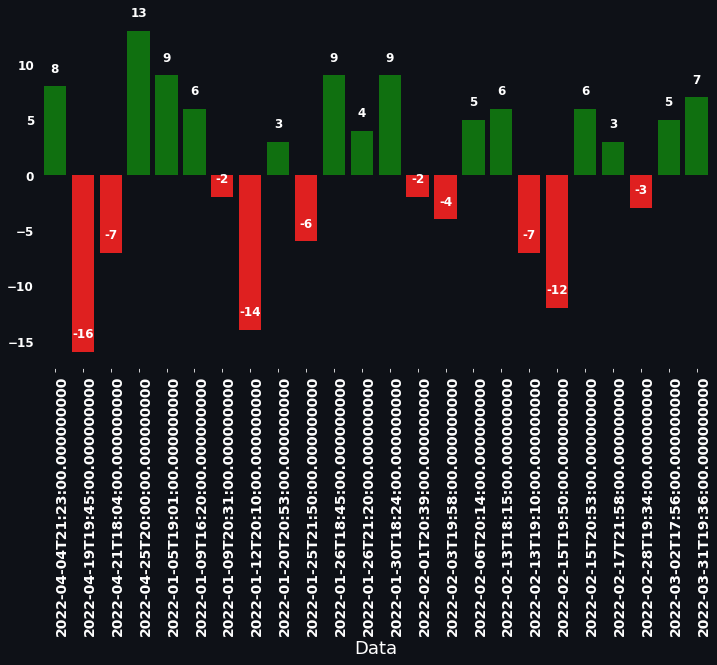

In [33]:
def plot_diff_per_game(df_plot, map): #total #against, #conceived
    rc = {'figure.figsize':(12,6.5),
          'axes.facecolor':'#0e1117',
          'axes.edgecolor': '#0e1117',
          'axes.labelcolor': 'white',
          'figure.facecolor': '#0e1117',
          'patch.edgecolor': '#0e1117',
          'text.color': 'white',
          'xtick.color': 'white',
          'ytick.color': 'white',
          'grid.color': 'grey',
          'font.size' : 12,
          'font.weight': 'bold',
          'axes.labelsize': 18,
          'xtick.labelsize': 14}
    
    plt.rcParams.update(rc)
    fig, ax = plt.subplots()
    
    df_plot = df_plot.query(f'map=="{map}"')
    df_plot['date_plt'] = df_plot['GAME_DATE'].dt.strftime('%d-%m-%y %H:%M')
    colors = ['g' if c >= 0 else 'r' for c in df_plot.score_diff]
    ax = sns.barplot(x="GAME_DATE", y='score_diff', data=df_plot, palette = colors)
    ax.set(xlabel = "Data")
    plt.xticks(rotation=90,horizontalalignment="left")
    #plt.title(f'Resultado por mês - {map}')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center', 
                xytext = (0, 18),
                rotation = 0,
                textcoords = 'offset points')

    ax.set(ylabel=None)  # remove the y-axis label
    ax.tick_params(left=False)  # remove the ticks
    plt.show()
    #st.pyplot(fig)

plot_diff_per_game(team_data, 'mirage')

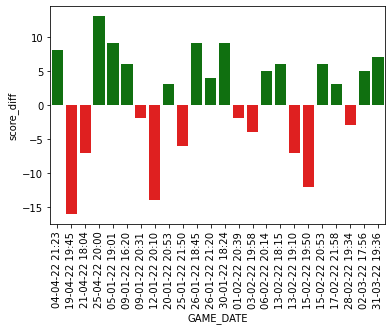

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.barplot(x=team_data.query('map=="mirage"')['GAME_DATE'].dt.strftime('%d-%m-%y %H:%M'), y=team_data.query('map=="mirage"')['score_diff'], ax=ax, palette=colors)
ax.tick_params(axis='x', rotation=90)

In [5]:
def return_pct_win_per_map_per_month(df):
    games_per_map_per_month = df.groupby(['MONTH_YR', 'map'])['map'].count().reset_index(name='games_played')
    victories_per_map_per_month = df.query('result == "V"').groupby(['MONTH_YR', 'result', 'map'])['result'].count().reset_index(name='wins')
    victories_per_map_per_month = victories_per_map_per_month.merge(games_per_map_per_month, on=['MONTH_YR', 'map'])
    victories_per_map_per_month['pct_win'] = round(victories_per_map_per_month['wins'] / victories_per_map_per_month['games_played'], 2)
    return victories_per_map_per_month[['MONTH_YR', 'map', 'wins', 'games_played', 'pct_win']]

In [92]:
games_per_map_per_month = team_data.groupby(['MONTH_YR', 'map'])['map'].count().reset_index(name='num_jogos')
victories_per_map_per_month = team_data.query('result == "V"').groupby(['MONTH_YR', 'result', 'map'])['result'].count().reset_index(name='contagem')
victories_per_map_per_month = victories_per_map_per_month.merge(games_per_map_per_month, on=['MONTH_YR', 'map'])
victories_per_map_per_month['pct_win'] = round(victories_per_map_per_month['contagem'] / victories_per_map_per_month['num_jogos'], 2)
victories_per_map_per_month

,MONTH_YR,result,map,contagem,num_jogos,pct_win
0,01/2022,V,inferno,2,7,0.29
1,01/2022,V,mirage,6,9,0.67
2,01/2022,V,nuke,3,3,1.00
3,01/2022,V,overpass,4,4,1.00
4,02/2022,V,inferno,4,12,0.33
5,02/2022,V,mirage,4,9,0.44
6,02/2022,V,nuke,5,7,0.71
7,02/2022,V,overpass,2,5,0.40
8,03/2022,V,inferno,2,3,0.67
9,03/2022,V,mirage,2,2,1.00


In [67]:
victories_per_map_per_month = team_data.groupby(['MONTH_YR', 'result', 'map'])['result'].count().reset_index(name='contagem')
victories_per_map_per_month = victories_per_map_per_month.merge(games_per_map_per_month, on=['MONTH_YR', 'map'])
victories_per_map_per_month = victories_per_map_per_month[['MONTH_YR', 'result', 'map', 'contagem']]
victories_per_map_per_month.head(2)

,MONTH_YR,result,map,contagem
0,01/2022,D,inferno,5
1,01/2022,V,inferno,2
